In [3]:
from dotenv import load_dotenv
import os

load_dotenv()  # Load environment variables from .env

# Access the API key using os.getenv():
api_key = os.getenv("OPENAI_API_KEY")


In [9]:
from openai import OpenAI

client = OpenAI(api_key=api_key)

response = client.images.generate(
  model="dall-e-3",
  prompt=" Generate a beautiful certificate base background, " ,
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

In [11]:
from IPython.display import display, Image as IPImage
display(IPImage(url=image_url))

In [12]:
from openai import OpenAI
import requests
from PIL import Image
import io
import cv2
from datetime import datetime


image_url = response.data[0].url

# Download the generated image
image_response = requests.get(image_url)
image_bytes = io.BytesIO(image_response.content)

# Open the image using PIL
certificate_background = Image.open(image_bytes)

# Save the generated background image
certificate_background.save("certificate_background.png")


In [15]:
# Step 2: Code to Dynamically Add Information
import numpy as np

def generate_certificate(full_name, logo_path, date, background_image, output_path):
    # Convert PIL image to NumPy array
    certificate = np.array(background_image)

    # Resize the logo image to fit in the template
    logo = cv2.imread(logo_path)
    logo = cv2.resize(logo, (100, 100))  # Adjust the size as needed

    # Add the logo to the certificate
    certificate[50:150, 50:150] = logo  # Adjust the position as needed

    # Add text information
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_size = 1
    font_thickness = 2
    font_color = (0, 0, 0)  # Black color

    # Full Name
    cv2.putText(certificate, full_name, (200, 300), font, font_size, font_color, font_thickness, cv2.LINE_AA)

    # Date
    date_text = f"Date: {date}"
    cv2.putText(certificate, date_text, (200, 350), font, font_size, font_color, font_thickness, cv2.LINE_AA)

    # Convert NumPy array back to PIL image
    certificate_with_info = Image.fromarray(certificate)

    # Save the final certificate
    certificate_with_info.save(output_path)

In [17]:
import numpy as np

def generate_certificate(full_name, logo_path, date, background_image, output_path):
    # Convert PIL image to NumPy array
    certificate = np.array(background_image)

    # Resize the logo image to fit in the template
    logo = cv2.imread(logo_path)
    logo = cv2.resize(logo, (100, 100))  # Adjust the size as needed

    # Calculate the center position for the logo
    logo_position = ((certificate.shape[1] - logo.shape[1]) // 2, (certificate.shape[0] - logo.shape[0]) // 2)

    # Add the logo to the certificate at the center position
    certificate[logo_position[1]:logo_position[1] + logo.shape[0], logo_position[0]:logo_position[0] + logo.shape[1]] = logo

    # Add text information
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_size = 1
    font_thickness = 2
    font_color = (0, 0, 0)  # Black color

    # Full Name
    text_size_full_name = cv2.getTextSize(full_name, font, font_size, font_thickness)[0]
    text_position_full_name = ((certificate.shape[1] - text_size_full_name[0]) // 2, logo_position[1] + logo.shape[0] + 50)
    cv2.putText(certificate, full_name, text_position_full_name, font, font_size, font_color, font_thickness, cv2.LINE_AA)

    # Date
    date_text = f"Date: {date}"
    text_size_date = cv2.getTextSize(date_text, font, font_size, font_thickness)[0]
    text_position_date = ((certificate.shape[1] - text_size_date[0]) // 2, text_position_full_name[1] + text_size_full_name[1] + 20)
    cv2.putText(certificate, date_text, text_position_date, font, font_size, font_color, font_thickness, cv2.LINE_AA)

    # Convert NumPy array back to PIL image
    certificate_with_info = Image.fromarray(certificate)

    # Save the final certificate
    certificate_with_info.save(output_path)

In [18]:
full_name = "Abamitchew Tomas Belay"
logo_path = "certificate_background.png"
date = datetime.now().strftime("%Y-%m-%d")
output_path = "output_certificate.png"

generate_certificate(full_name, logo_path, date, certificate_background, output_path)

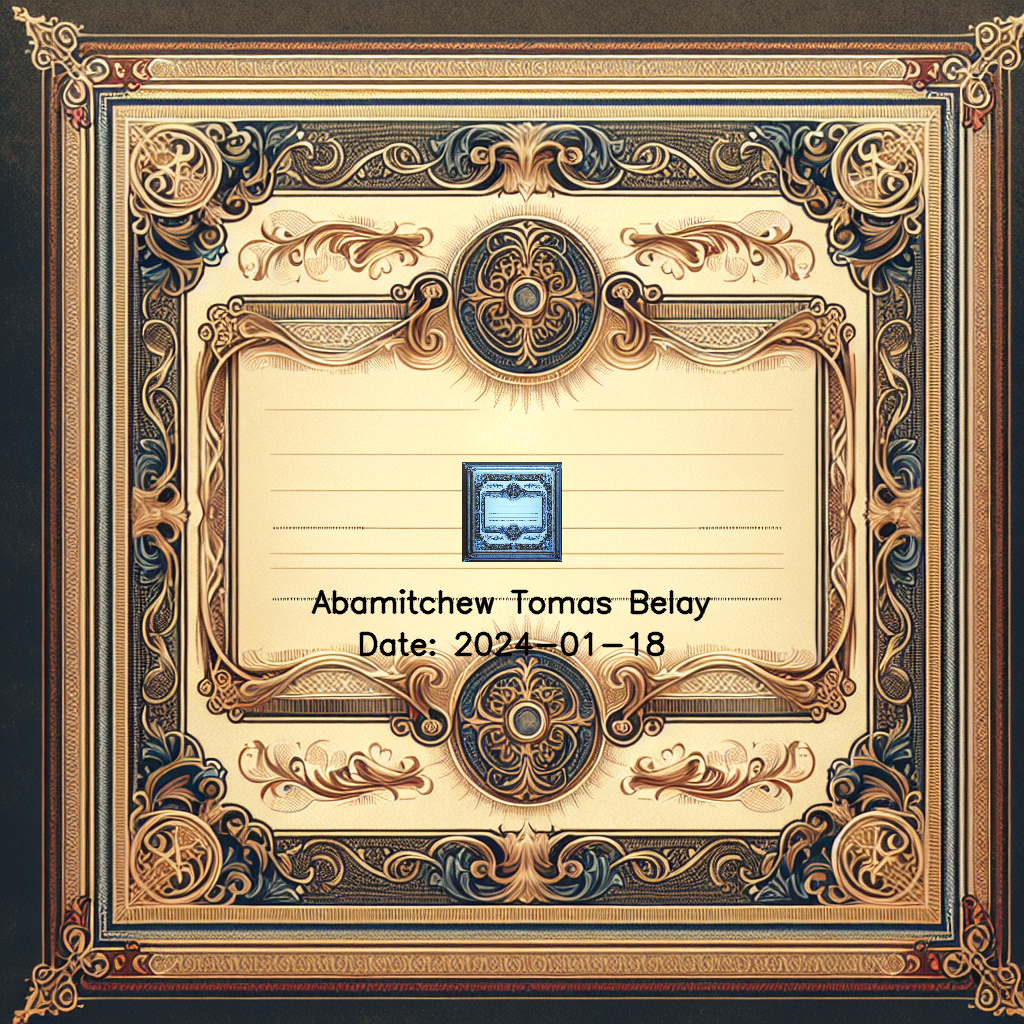

In [23]:
from IPython.display import Image, display

# Path to the generated certificate image
output_certificate_path = 'output_certificate.png'

# Display the image
display(Image(filename=output_certificate_path))
